# **Graded Challenge 2 :**

## I. Perkenalan

Nama : Muhammad Farhan Darmawan

Batch : 019

Saya salah satu anggota data science yang akan melakukan sebuah project berkaitan dengan bagaimana pengelolaan sampah di kota `Austin Smart City` dengan data statistik untuk mengetahui

### **Objective :**

Kota Austin Smart City memiliki sistem pembuangan dan pengelolaan sampah yang cukup baik. Sebagai data scientist tentunya hal ini dapat saya jadikan riset dengan menggunakan data tersebut. Riset ini saya akan menggunakan analisa statistik untuk memberikan rekomendasi kepada pemerintah kota Austin Smart City dalam penambahan site baru.

Selain itu, saya juga akan melakukan forecasting banyaknya load sampah yang dapat di angkut pada tanggal 10 Juli 2021

**Berikut merupakan syntax untuk memanggil dataset `waste_and_diversion`**

SELECT report_date, load_time, load_type, load_weight, dropoff_site FROM `bigquery-public-data.austin_waste.waste_and_diversion` WHERE report_date >= '2021-01-01'


**Dataset `waste_and_diversion` ini terdiri dari beberapa kolom yakni :**

- `report_date` : Data tanggal diangkutnya sampah
- `load_time` : Data waktu (tanggal dan jam) diangkutnya sampah
- `load_type` : Data kategori sampah yang diangkut
- `load_weight` : Data berat sampah yang diangkut
- `dropoff_site` : Lokasi tempat pembuangan sampah

## II. Import Library

In [ ]:
# import library yang akan digunakan
import pandas as pd
import numpy as np
import sympy as sy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Import File dari `Google Drive`

---



In [ ]:
# import file dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## III.Data Loading

### Load Data .csv dari `Google Drive`

In [ ]:
# membaca file csv menggunakan pandas
data_limbah = pd.read_csv('/content/drive/MyDrive/Dataset GC-2/h8dsft_P0GC2_Muhammad Farhan Darmawan.csv')

data_limbah

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF
...,...,...,...,...,...
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH


### Informasi Sederhana Dataframe

In [ ]:
# Menampilkan 10 data teratas
data_limbah.head(10)

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF
5,2021-02-27,2021-02-27 12:43:00 UTC,TIRES,320.0,MRF
6,2021-02-27,2021-02-27 11:53:00 UTC,TIRES,740.0,MRF
7,2021-02-27,2021-02-27 06:59:00 UTC,TIRES,1720.0,MRF
8,2021-05-08,2021-05-08 09:05:00 UTC,TIRES,4360.0,MRF
9,2021-05-08,2021-05-08 02:31:00 UTC,TIRES,1740.0,MRF


In [ ]:
# Menampilkan 10 data terbawah
data_limbah.tail(10)

,report_date,load_time,load_type,load_weight,dropoff_site
26147,2021-03-01,2021-03-01 12:38:00 UTC,ORGANICS,21680.0,ORGANICS BY GOSH
26148,2021-03-01,2021-03-01 10:49:00 UTC,ORGANICS,12580.0,ORGANICS BY GOSH
26149,2021-03-01,2021-03-01 12:00:00 UTC,ORGANICS,20100.0,ORGANICS BY GOSH
26150,2021-03-01,2021-03-01 12:00:00 UTC,ORGANICS,16960.0,ORGANICS BY GOSH
26151,2021-03-01,2021-03-01 11:19:00 UTC,ORGANICS,18580.0,ORGANICS BY GOSH
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH
26156,2021-03-01,2021-03-01 10:22:00 UTC,RECYCLED METAL,360.0,AUSTIN IRON AND METAL


In [ ]:
# Mengetahui matrix data
data_limbah.shape

(26157, 5)

Diketahui bahwa `data_limbah` memiliki 26.157 baris data dengan jumlah kolom 5

In [ ]:
# Menampilkan informasi data
data_limbah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


In [ ]:
# Menampilkan jumlah data yang null
data_limbah.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

Diketahui pada `data_limbah` adanya nilai null pada data `load_weight` sebesar 1.048 sehingga data ini perlu kita lakukan *handling missing value*

# **Problem 1 : Statistic**

## I. Missing Values

**Handling missing values menggunakan grafik skewness**

In [ ]:
# Mencari nilai mean dan median dari kolom load_weight
weight = data_limbah['load_weight']
weight_mean = weight.mean()
weight_median = weight.median()

In [ ]:
print('Nilai mean dari load weight :', weight_mean)
print('Nilai median dari load weight :', weight_median)

Nilai mean dari load weight : 12227.136307276274
Nilai median dari load weight : 11300.0


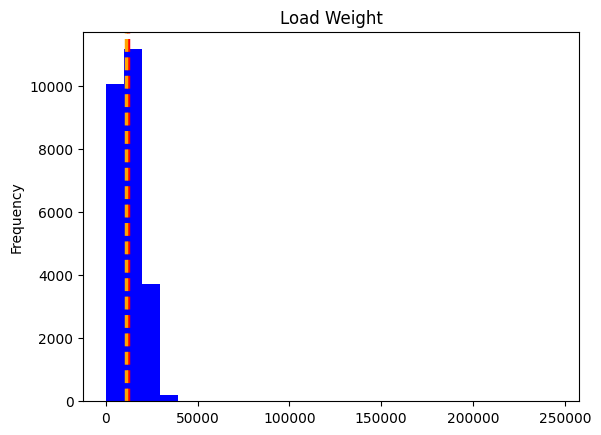

In [ ]:
# Menampilkan grafik skewness dari data load_weight
weight.plot.hist(title = 'Load Weight', color = 'blue', bins = 25)
plt. axvline(weight.mean(), color = 'red', linestyle = 'dashed', linewidth = 2.5)
plt. axvline(weight.median(), color = 'orange', linestyle = 'dashed', linewidth = 2.5)

In [ ]:
# Mencari nilai skewness dari data load_weight
weight.skew()

3.335938213321684

Dari grafik skewness diatas dan nilai skewness yang telah dicari, dapat diketahui bahwa data `load_weight` penyebaran datanya tidak normal (`distribusi tidak normal`) dengan kemiringan `sangat miring` sehingga nilai `null` dapat diisi dengan nilai `median` dari data `load_weight`

**Missing values diisi dengan data median**

In [ ]:
# Mengisi nilai null menggunakan fillna()
data_limbah['load_weight'].fillna(data_limbah['load_weight'].median(), inplace = True)

In [ ]:
# Menampilkan nilai null yang telah diisi dengan fillna()
data_limbah.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

Missing values sudah tidak ada

## II. Explorating Data

In [ ]:
# Menampilkan waktu pertama kali pengangkutan di tahun 2021
data_limbah['report_date'].min()

'2021-01-01'

In [ ]:
# Menampilkan waktu terakhir kali pengangkutan di tahun 2021
data_limbah['report_date'].max()

'2021-07-09'

Pengangkutan limbah pertama kali dilakukan pada tanggal `01 Januari 2021` dan terakhir kali pada tanggal `09 Juli 2021` di tahun 2021

In [ ]:
# Menggabungkan kolom dengan tipe object
obj_cols = list(data_limbah.select_dtypes('object'))

In [ ]:
# Menampilkan deskripsi kolom dengan tipe object
data_limbah[obj_cols].describe()

,report_date,load_time,load_type,dropoff_site
count,26157,26157,26157,26157
unique,166,19766,14,18
top,2021-02-25,2021-03-05 12:00:00 UTC,GARBAGE COLLECTIONS,TDS LANDFILL
freq,277,30,8242,10694


Penjelasan :
- Dapat diketahui bahwa `load_type` memiliki 14 nilai unik, dan `dropoff_site` memiliki 18 nilai unik

In [ ]:
# Menampilkan nilai unik dari load_type
data_limbah['load_type'].unique()

array(['TIRES', 'RECYCLING - SINGLE STREAM', 'SWEEPING', 'BRUSH',
       'GARBAGE COLLECTIONS', 'YARD TRIMMING', 'BULK', 'ORGANICS',
       'DEAD ANIMAL', 'MIXED LITTER', 'LITTER', 'RECYCLED METAL',
       'CONTAMINATED RECYCLING', 'CONTAMINATED ORGANICS'], dtype=object)

In [ ]:
# Menampilkan nilai unik dari dropoff_site
data_limbah['dropoff_site'].unique()

array(['MRF', 'TDS - MRF', 'ONION CREEK', 'PARK CENTER', 'HORNSBY BEND',
       'TDS LANDFILL', 'GREAT NORTHERN', 'ORGANICS BY GOSH',
       'BALCONES RECYCLING', 'ON ROUTE HIGH DUMP',
       'AUSTIN IRON AND METAL', 'PARK BEND', 'BALCONES WOODS',
       'STEINER LANDFILL', 'WESTFIELD', 'ST. EDWARDS',
       'AUSTIN WOOD RECYCLING', 'WILCAB'], dtype=object)

In [ ]:
# Merubah kolom report_date dari tipe object(str) menjadi tipe date
data_limbah['report_date'] = pd.to_datetime(data_limbah['report_date'], format= '%Y/%m/%d')

In [ ]:
# Menampilkan informasi data terbaru dari data_limbah
data_limbah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   report_date   26157 non-null  datetime64[ns]
 1   load_time     26157 non-null  object        
 2   load_type     26157 non-null  object        
 3   load_weight   26157 non-null  float64       
 4   dropoff_site  26157 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1021.9+ KB


**Query, group, dan Agg**

In [ ]:
# Menambahkan kolom baru berupa month pada dataframe data_limbah
data_limbah['Month'] = data_limbah['report_date'].dt.month

data_limbah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   report_date   26157 non-null  datetime64[ns]
 1   load_time     26157 non-null  object        
 2   load_type     26157 non-null  object        
 3   load_weight   26157 non-null  float64       
 4   dropoff_site  26157 non-null  object        
 5   Month         26157 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
# Menampilkan 20 data teratas dari data dengan jenis limbah TIRES di lokasi MRF
data_limbah.query("load_type == 'TIRES' & \
                  dropoff_site == 'MRF'").sort_values(['load_weight'], ascending=False).head(20)

,report_date,load_time,load_type,load_weight,dropoff_site,Month
24289,2021-02-10,2021-02-10 12:00:00 UTC,TIRES,17500.0,MRF,2
24101,2021-02-09,2021-02-09 12:00:00 UTC,TIRES,13800.0,MRF,2
7438,2021-04-12,2021-04-12 04:30:00 UTC,TIRES,6000.0,MRF,4
12868,2021-05-20,2021-05-20 03:30:00 UTC,TIRES,4770.0,MRF,5
8,2021-05-08,2021-05-08 09:05:00 UTC,TIRES,4360.0,MRF,5
17788,2021-06-28,2021-06-28 03:39:00 UTC,TIRES,4120.0,MRF,6
17787,2021-06-28,2021-06-28 11:01:00 UTC,TIRES,3520.0,MRF,6
13961,2021-05-28,2021-05-28 09:00:00 UTC,TIRES,3340.0,MRF,5
22068,2021-01-25,2021-01-25 02:27:00 UTC,TIRES,3260.0,MRF,1
18981,2021-07-07,2021-07-07 11:34:00 UTC,TIRES,3200.0,MRF,7


In [ ]:
# Menampilkan 20 data teratas dari data dengan jenis limbah ORGANICS
data_limbah.query("load_type == 'ORGANICS'").sort_values(['load_weight'], ascending=False).head(20)

,report_date,load_time,load_type,load_weight,dropoff_site,Month
14759,2021-06-03,2021-06-03 07:05:00 UTC,ORGANICS,29660.0,ORGANICS BY GOSH,6
16120,2021-06-14,2021-06-14 06:15:00 UTC,ORGANICS,29160.0,ORGANICS BY GOSH,6
15165,2021-06-07,2021-06-07 12:00:00 UTC,ORGANICS,29000.0,ORGANICS BY GOSH,6
14594,2021-06-02,2021-06-02 05:39:00 UTC,ORGANICS,28120.0,ORGANICS BY GOSH,6
25825,2021-02-26,2021-02-26 05:12:00 UTC,ORGANICS,27620.0,ORGANICS BY GOSH,2
26116,2021-03-01,2021-03-01 05:36:00 UTC,ORGANICS,27300.0,ORGANICS BY GOSH,3
3443,2021-03-15,2021-03-15 12:00:00 UTC,ORGANICS,27240.0,ORGANICS BY GOSH,3
16299,2021-06-15,2021-06-15 02:07:00 UTC,ORGANICS,27120.0,ORGANICS BY GOSH,6
25139,2021-02-23,2021-02-23 03:03:00 UTC,ORGANICS,26400.0,ORGANICS BY GOSH,2
14925,2021-06-04,2021-06-04 04:58:00 UTC,ORGANICS,26240.0,ORGANICS BY GOSH,6


In [ ]:
# Menampilkan 20 data teratas dari data dengan jenis limbah LITTER pada bulan April
data_limbah.query("load_type == 'LITTER'& \
                  Month == 4").sort_values(['load_weight'], ascending=False).head(20)

,report_date,load_time,load_type,load_weight,dropoff_site,Month
611,2021-04-17,2021-04-17 12:00:00 UTC,LITTER,6340.0,TDS LANDFILL,4
9168,2021-04-22,2021-04-22 12:00:00 UTC,LITTER,5200.0,TDS LANDFILL,4
9364,2021-04-23,2021-04-23 12:00:00 UTC,LITTER,3060.0,TDS LANDFILL,4
10287,2021-04-30,2021-04-30 12:00:00 UTC,LITTER,2660.0,TDS LANDFILL,4
610,2021-04-10,2021-04-10 12:00:00 UTC,LITTER,2580.0,TDS LANDFILL,4
9365,2021-04-23,2021-04-23 12:00:00 UTC,LITTER,1160.0,TDS LANDFILL,4
8136,2021-04-15,2021-04-15 12:00:00 UTC,LITTER,1100.0,TDS LANDFILL,4
7297,2021-04-09,2021-04-09 12:00:00 UTC,LITTER,1080.0,TDS LANDFILL,4
8360,2021-04-16,2021-04-16 12:00:00 UTC,LITTER,1000.0,TDS LANDFILL,4
8150,2021-04-15,2021-04-15 12:00:00 UTC,LITTER,900.0,TDS LANDFILL,4


In [ ]:
# Menampilkan jumlah data limbah berdasarkan load_type pada tiap dropff_site yang ada pada tahun 2021
data_limbah[(data_limbah['Month'] >= 1)].groupby(['dropoff_site', 'load_type'])['load_type'].count()

dropoff_site           load_type                
AUSTIN IRON AND METAL  RECYCLED METAL                 50
AUSTIN WOOD RECYCLING  RECYCLING - SINGLE STREAM       2
BALCONES RECYCLING     RECYCLING - SINGLE STREAM    3837
BALCONES WOODS         RECYCLING - SINGLE STREAM       1
GREAT NORTHERN         GARBAGE COLLECTIONS             6
                       SWEEPING                       64
HORNSBY BEND           BRUSH                        1515
                       GARBAGE COLLECTIONS             1
                       ORGANICS                        2
                       YARD TRIMMING                 137
MRF                    BULK                            2
                       RECYCLED METAL                  1
                       TIRES                         165
ON ROUTE HIGH DUMP     ORGANICS                        7
                       SWEEPING                       74
ONION CREEK            SWEEPING                      813
ORGANICS BY GOSH       DEAD ANIMAL     

In [ ]:
# Menampilkan jumlah data limbah pada tiap dropff_site yang ada pada tahun 2021
data_limbah[(data_limbah['Month'] >= 1)].groupby(['dropoff_site'])['load_type'].count()

dropoff_site
AUSTIN IRON AND METAL       50
AUSTIN WOOD RECYCLING        2
BALCONES RECYCLING        3837
BALCONES WOODS               1
GREAT NORTHERN              70
HORNSBY BEND              1655
MRF                        168
ON ROUTE HIGH DUMP          81
ONION CREEK                813
ORGANICS BY GOSH          5755
PARK BEND                    4
PARK CENTER                 75
ST. EDWARDS                  1
STEINER LANDFILL             1
TDS - MRF                 2948
TDS LANDFILL             10694
WESTFIELD                    1
WILCAB                       1
Name: load_type, dtype: int64

In [ ]:
# Menampilkan berat dari masing masing jenis load_type di tiap dropoff_site pada bulan Februari
data_limbah[(data_limbah['Month'] == 2)].groupby(['Month', 'load_type', 'dropoff_site'])['load_weight'].sum()

Month  load_type                  dropoff_site         
2      BRUSH                      HORNSBY BEND              1483040.0
       BULK                       TDS LANDFILL              1833200.0
       DEAD ANIMAL                ORGANICS BY GOSH              560.0
                                  TDS LANDFILL                 1660.0
       GARBAGE COLLECTIONS        GREAT NORTHERN              76860.0
                                  HORNSBY BEND                 8600.0
                                  TDS - MRF                   49340.0
                                  TDS LANDFILL             19864840.0
       LITTER                     TDS LANDFILL                17240.0
       MIXED LITTER               TDS LANDFILL               100240.0
       ORGANICS                   ORGANICS BY GOSH          6309480.0
                                  PARK BEND                   20400.0
                                  TDS LANDFILL                  300.0
       RECYCLED METAL             

In [ ]:
# Menampilkan jumlah data dengan jenis limbah DEAD ANIMAL pada tiap dropoff_site dari bulan Januari-Juli 
data_limbah[(data_limbah['load_type'] == 'DEAD ANIMAL')].groupby(['load_type', 'dropoff_site'])['load_type'].count()

load_type    dropoff_site    
DEAD ANIMAL  ORGANICS BY GOSH     19
             TDS LANDFILL        131
Name: load_type, dtype: int64

## III.Central Tendency (Mean, Median, Modus)

<Axes: title={'center': 'mean tiap site'}, xlabel='dropoff_site'>

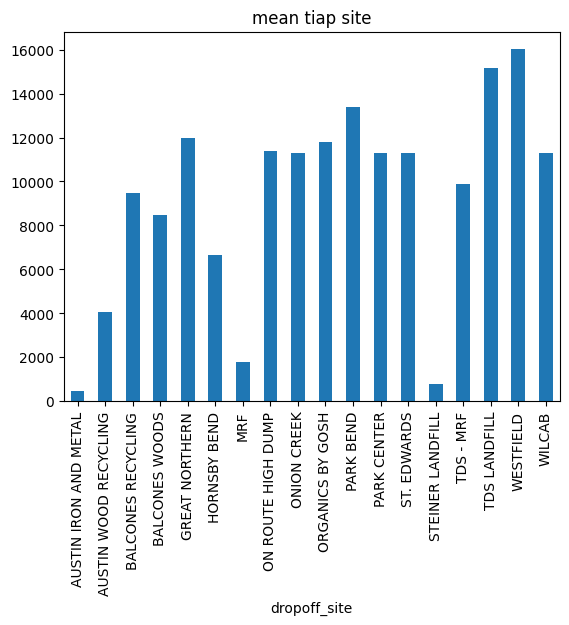

In [ ]:
# Menampilkan nilai rata rata dari tiap dropoff_site pada tahun 2021
mean_data = data_limbah[(data_limbah['Month'] >= 1)].groupby(['dropoff_site'])['load_weight'].mean()

mean_data.plot(kind = 'bar', title = 'mean tiap site')

In [ ]:
# Menampilkan nilai rata rata dari tiap dropoff_site pada tahun 2021
mean_data

dropoff_site
AUSTIN IRON AND METAL      451.200000
AUSTIN WOOD RECYCLING     4050.000000
BALCONES RECYCLING        9464.652072
BALCONES WOODS            8460.000000
GREAT NORTHERN           11973.142857
HORNSBY BEND              6637.111782
MRF                       1799.982143
ON ROUTE HIGH DUMP       11405.925926
ONION CREEK              11300.000000
ORGANICS BY GOSH         11817.220851
PARK BEND                13385.000000
PARK CENTER              11300.000000
ST. EDWARDS              11300.000000
STEINER LANDFILL           780.000000
TDS - MRF                 9872.550882
TDS LANDFILL             15168.321726
WESTFIELD                16020.000000
WILCAB                   11300.000000
Name: load_weight, dtype: float64

<Axes: title={'center': 'median tiap site'}, xlabel='dropoff_site'>

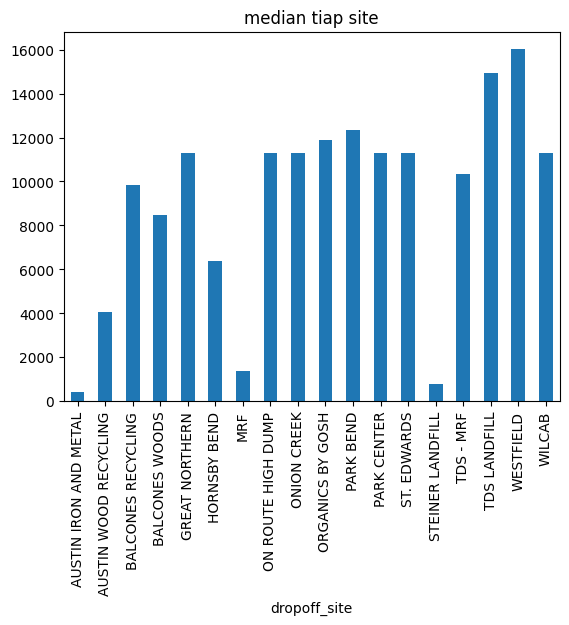

In [ ]:
# Menampilkan nilai median dari tiap dropoff_site pada tahun 2021
median_data = data_limbah[(data_limbah['Month'] >= 1)].groupby(['dropoff_site'])['load_weight'].median()

median_data.plot(kind = 'bar', title = 'median tiap site')

In [ ]:
# Menampilkan nilai median dari tiap dropoff_site pada tahun 2021
median_data

dropoff_site
AUSTIN IRON AND METAL      400.0
AUSTIN WOOD RECYCLING     4050.0
BALCONES RECYCLING        9840.0
BALCONES WOODS            8460.0
GREAT NORTHERN           11300.0
HORNSBY BEND              6400.0
MRF                       1360.0
ON ROUTE HIGH DUMP       11300.0
ONION CREEK              11300.0
ORGANICS BY GOSH         11900.0
PARK BEND                12330.0
PARK CENTER              11300.0
ST. EDWARDS              11300.0
STEINER LANDFILL           780.0
TDS - MRF                10330.0
TDS LANDFILL             14920.0
WESTFIELD                16020.0
WILCAB                   11300.0
Name: load_weight, dtype: float64

In [ ]:
# Menampilkan frekuensi data dropoff_site yang paling banyak atau sering muncul pada tahun 2021
modus_data = data_limbah['dropoff_site'].mode()[0]

modus_data

'TDS LANDFILL'

Insight :

- Dari nilai `mean` dan `median` di tiap site berdasarkan nilai `load_weight` yang bisa ditampung pada masing masing site, site tertinggi yaitu berada pada site `WESTFIELD`

- Dari nilai `modus` site yang frekuensi paling banyak menampung limbah yaitu site `TDS LANDFILL`

- Dari nilai `mean` diketahui bahwa ada 3 site yang memiliki kapasitas besar untuk menampung limbah yakni `WESTFIELD`, `TDS LANDFILL`, dan `Park BEND`

## IV. Site Paling Menarik

Site yang paling menarik perhatian saya yaitu site `ORGANICS BY GOSH` karena terdiri dari tipe `DEAD ANIMAL`, `ORGANICS`, `GARBAGE COLLECTIONS`, `RECYCLED METAL`, dan `SWEEPING` dengan jumlah data didominansi oleh limbah bertipe `ORGANICS`

## V. Outlier Site `ORGANICS BY GOSH`

**Check distribusi data `load_weight` di site `ORGANICS BY GOSH`**

In [ ]:
# Buat dataframe baru berdasarkan dropoff_site data ORGANICS BY GOSH
data_site_organic = data_limbah[(data_limbah['dropoff_site'] == 'ORGANICS BY GOSH')]

data_site_organic

,report_date,load_time,load_type,load_weight,dropoff_site,Month
775,2021-02-21,2021-02-21 10:41:00 UTC,ORGANICS,2480.0,ORGANICS BY GOSH,2
776,2021-03-14,2021-03-14 01:37:00 UTC,ORGANICS,21700.0,ORGANICS BY GOSH,3
777,2021-03-21,2021-03-21 07:56:00 UTC,ORGANICS,7120.0,ORGANICS BY GOSH,3
778,2021-02-21,2021-02-21 11:07:00 UTC,ORGANICS,5560.0,ORGANICS BY GOSH,2
779,2021-03-14,2021-03-14 03:04:00 UTC,ORGANICS,20460.0,ORGANICS BY GOSH,3
...,...,...,...,...,...,...
26151,2021-03-01,2021-03-01 11:19:00 UTC,ORGANICS,18580.0,ORGANICS BY GOSH,3
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH,3
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH,3
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH,3


In [ ]:
# Ambil kolom load_weight pada dataframe data_site_organic untuk dicari nilai mean dan median
weight_organic = data_site_organic['load_weight']

weight_organic_mean = weight_organic.mean()
weight_organic_median = weight_organic.median()

In [ ]:
print('Nilai mean dari load weight :', weight_organic_mean)
print('Nilai median dari load weight :', weight_organic_median)

Nilai mean dari load weight : 11817.220851433536
Nilai median dari load weight : 11900.0


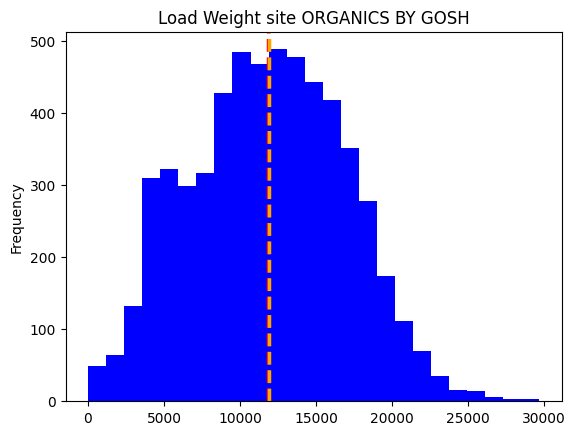

In [ ]:
# Menampilkan grafik skewness dari data load_weight site ORGANICS BY GOSH
weight_organic.plot.hist(title = 'Load Weight site ORGANICS BY GOSH', color = 'blue', bins = 25)
plt. axvline(weight_organic.mean(), color = 'red', linestyle = 'dashed', linewidth = 2.5)
plt. axvline(weight_organic.median(), color = 'orange', linestyle = 'dashed', linewidth = 2.5)

In [ ]:
# Mencari nilai skewness dari load_weight site ORGANICS BY GOSH
weight_organic.skew()

0.05937529539509636

Hasil Skewness :

Dari grafik dan nilai skewness diatas diketahui bahwa distribusi data pada `load_weight` site `ORGANICS BY GOSH` merupakan `distribusi normal` dengan kemiringan `simetris`

<Axes: title={'center': 'load_weight site ORGANICS BY GOSH'}>

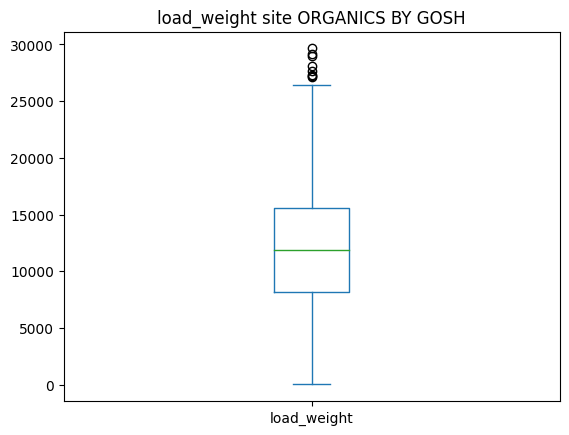

In [ ]:
# Menampilkan grafik outlier weight_organic
data_site_organic['load_weight'].plot(kind = 'box', title = 'load_weight site ORGANICS BY GOSH')

Penjelasan :

- Dari grafik box diatas pada data `load_weight` di site `ORGANICS BY GOSH` terdapat outlier

**Penggunaan Z-Score untuk mengetahui jumlah data termasuk outlier dan tidak termasuk outlier**

In [ ]:
site_organic = data_site_organic.copy()

In [ ]:
site_organic['zscore'] = (data_site_organic['load_weight'] - data_site_organic['load_weight'].mean()) / data_site_organic['load_weight'].std()
site_organic[['load_weight', 'zscore']]

,load_weight,zscore
775,2480.0,-1.843604
776,21700.0,1.951323
777,7120.0,-0.927451
778,5560.0,-1.235468
779,20460.0,1.706489
...,...,...
26151,18580.0,1.335289
26152,12100.0,0.055834
26153,10900.0,-0.181102
26154,21800.0,1.971068


In [ ]:
# Menampilkan jumlah data yang termasuk outlier
site_organic_outlier = site_organic[(site_organic['zscore'] < -3) | (site_organic['zscore'] > 3)]
site_organic_outlier.shape[0]

8

In [ ]:
# Menampilkan jumlah data yang tidak termasuk outlier
site_organic_no_outlier = site_organic[(site_organic['zscore'] >= -3) & (site_organic['zscore'] <= 3)]
site_organic_no_outlier.shape[0]

5747

Penjelasan :

- Diketahui bahwa jumlah data yang `termasuk outlier` yaitu 8 data
- Diketahui bahwa jumlah data yang `tidak termasuk outlier` yaitu 5.747 data

**Perbandingan Central Tendency (Mean, Median, Modus)**

In [ ]:
# Menampilkan nilai rata rata dari site ORGANICS BY GOSH pada tahun 2021 (tanpa outlier)
mean_data_site = site_organic_no_outlier[(site_organic_no_outlier['Month'] >= 1)].groupby(['dropoff_site'])['load_weight'].mean()

mean_data_site

dropoff_site
ORGANICS BY GOSH    11794.481643
Name: load_weight, dtype: float64

In [ ]:
# Menampilkan nilai median dari site ORGANICS BY GOSH pada tahun 2021 (tanpa outlier)
median_data_site = site_organic_no_outlier[(site_organic_no_outlier['Month'] >= 1)].groupby(['dropoff_site'])['load_weight'].median()

median_data_site

dropoff_site
ORGANICS BY GOSH    11880.0
Name: load_weight, dtype: float64

In [ ]:
# Menampilkan frekuensi data load_type pada site ORGANICS BY GOSH yang paling banyak atau sering muncul pada tahun 2021
modus_data = data_limbah[data_limbah['dropoff_site'] == 'ORGANICS BY GOSH']['load_type'].mode()[0]

modus_data

'ORGANICS'

In [ ]:
# Menampilkan frekuensi data load_type pada site ORGANICS BY GOSH yang paling banyak atau sering muncul pada tahun 2021 (tanpa outlier)
modus_data_site = site_organic_no_outlier['load_type'].mode()[0]

modus_data_site

'ORGANICS'

Penjelasan :

- Pada data `mean` site `ORGANICS BY GOSH` dari yang awalnya memiliki nilai `11817.220851` turun menjadi `11794.481643`

- Pada data `median` site `ORGANICS BY GOSH` dari yang awalnya memiliki nilai `11900.0` berubah menjadi `11880.0`

- Pada data `modus` site `ORGANICS BY GOSH` memiliki nilai modus yang sama yaitu frekuensi terbanyak berada pada `load_type` : `ORGANICS`

## VI. Mencari Nilai Range, Variance, dan Standar Deviasi

**Data yang digunakan yakni site `ORGANICS BY GOSH` tanpa outlier**

In [ ]:
# Mencari nilai range
max_value = site_organic_no_outlier['load_weight'].max()
min_value = site_organic_no_outlier['load_weight'].min()
range =  max_value - min_value 

In [ ]:
# Mencari nilai variance
variance = site_organic_no_outlier['load_weight'].var()

In [ ]:
# Mencari nilai standard deviasi
standard_deviasi = site_organic_no_outlier['load_weight'].std()

In [ ]:
print('Nilai max :', max_value)
print('Nilai min :', min_value)
print('')
print('Nilai range :', range)
print('')
print('Nilai variance :', variance)
print('')
print('Nilai standard deviasi :', standard_deviasi)

Nilai max : 26400.0
Nilai min : 20.0

Nilai range : 26380.0

Nilai variance : 25313214.093075756

Nilai standard deviasi : 5031.223916014448


Penjelasan :

- Dari nilai `range` dapat diketahui bahwa distribusi data memiliki nilai `variabilitas tinggi` yang artinya berat limbah yang masuk sangat variatif

- Dari nilai `variance` dapat diketahui bahwa nilai nya cukup tinggi sehingga variasi nilai pada `load_weight` sangat beragam

- Dari nilai `standard deviasi` dapat diketahui bahwa *data points* dekat dengan nilai `mean` atau *data points* tidak menyimpang terlalu jauh dari nilai `mean` karena nilai `standard deviasi` cukup rendah

## **VII. Confidence Interval Site Baru**

Untuk data yang digunakan saya menggunakan data dari site `ORGANICS BY GOSH` tanpa outlier

In [ ]:
# Mencari nilai confidence interval
alpha = 0.05
n = len(site_organic_no_outlier)
xbar = site_organic_no_outlier['load_weight'].mean()
s = site_organic_no_outlier['load_weight'].std()
z = stats.t.ppf(1 - alpha/2, n-1)
ci = (xbar - z * s / pow(n, 0.5), xbar + z * s / pow(n, 0.5))

print('Nilai Confidence Interval :', ci)
print(xbar)

Nilai Confidence Interval : (11664.377049204122, 11924.58623598815)
11794.481642596136


Dari nilai `confidence interval` diatas diketahui `95%` yakin bahwa rata-rata minimum untuk pembuatan site baru memiliki berat `11664` kg dan maksimum dengan berat `11924` kg per hari

## **VIII. Uji Hipotesis Pembukaan Site Baru**

In [ ]:
# Buat data berisikan kolom report_date dan load_weight dengan nama daily_load_weight
daily_load_weight = site_organic_no_outlier[['report_date', 'load_weight']].groupby('report_date').mean()
daily_load_weight

,load_weight
report_date,
2021-01-02,14540.277778
2021-01-04,12021.250000
2021-01-05,12523.870968
2021-01-06,12219.629630
2021-01-07,14581.724138
...,...
2021-07-02,10206.296296
2021-07-05,11550.000000
2021-07-06,9552.812500


In [ ]:
# Mencari nilai mean dari load_weight per hari
print('Nilai mean berat angkut yang ada pada tahun 2021 di site ORGANICS BY GOSH adalah :', format(np.round(daily_load_weight['load_weight'].mean())))

Nilai mean berat angkut yang ada pada tahun 2021 di site ORGANICS BY GOSH adalah : 11398.0


Dikarenakan belum diketahui apakah site baru memiliki kapasitas rata rata yang lebih besar atau lebih kecil dari rata-rata kapasitas harian dari site `ORGANICS BY GOSH` maka hipotesis yang saya gunakan yaitu sample `two tailed`. Selain itu `critical value` sebesar 5%

Hipotesis dalam kasus ini :

**H0 : μ == 11,398 kg**

**H1 : μ != 11,398 kg** 

In [ ]:
# Menghitung nilai p-vlue dan t-statistic
t_stat,p_val = stats.ttest_1samp(daily_load_weight['load_weight'], 11398)
print('P-value :', p_val)
print('t-statistics :', t_stat)

P-value : 0.9988253941863613
t-statistics : 0.0014746394325705953


<ipython-input-58-cb2df07309ed>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(daily_load_weight_pop, label = 'Daily Weight (Population)', color = 'blue')


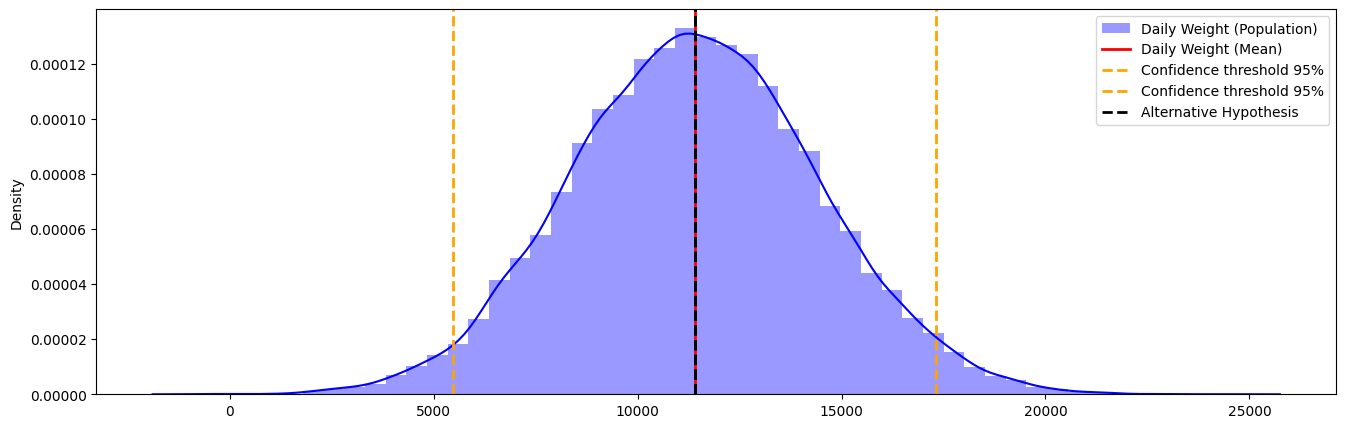

In [ ]:
# Menampilkan grafik apakah H1 diterima atau ditolak
daily_load_weight_pop = np.random.normal(daily_load_weight['load_weight'].mean(), daily_load_weight['load_weight'].std(), 30000)

ci = stats.norm.interval(0.95, daily_load_weight['load_weight'].mean(), daily_load_weight['load_weight'].std())

plt.figure(figsize=(16,5))
sns.distplot(daily_load_weight_pop, label = 'Daily Weight (Population)', color = 'blue')
plt.axvline(daily_load_weight['load_weight'].mean(), color = 'red', linewidth = 2, label = 'Daily Weight (Mean)')
plt.axvline(ci[1], color = 'orange', linestyle = 'dashed', linewidth = 2, label = 'Confidence threshold 95%')
plt.axvline(ci[0], color = 'orange', linestyle = 'dashed', linewidth = 2, label = 'Confidence threshold 95%')

plt.axvline(daily_load_weight_pop.mean() + t_stat*daily_load_weight_pop.std(), color = 'black', linestyle = 'dashed', linewidth = 2, label = 'Alternative Hypothesis')
plt.axvline(daily_load_weight_pop.mean() + t_stat*daily_load_weight_pop.std(), color = 'black', linestyle = 'dashed', linewidth = 2)
plt.legend()

Dari data `P-value` diatas dapat diketahui bahwa hasil kesimpulannya yaitu `H1 tidak diterima`, dikarenakan nilai `P-value` > `C-value`

Artinya bahwa pembukaan site baru ini per harinya hanya sanggup untuk menampung berat sebesar `11398` kg

## **IX. Jawaban Pertanyaan**

**1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya**

---

Dikarenakan setelah melakukan uji nilai skewness dan menampilkan grafik distribusi pada site `ORGANICS BY GOSH`, dengan `distribusi normal` maka cara handling outlier menggunakan `Z-Score`

**2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?**

---

Konsep `confidence interval` yakni mengetahui interval keyakinan berapa kapasitas yang mampu diterima oleh site baru, hasil dari `confidence interval` ini akan menunjukan batas bawah dan batas atas dari kapasitas yang nantinya mampu diterima oleh site baru

**3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?**

---

Jenis uji hipotesis yang saya lakukan yaitu menggunakan `one sample two tailed` karena saya hanya menggunakan 1 sample yakni site `ORGANICS BY GOSH`. Selain itu, saya menggunakan kondisi `two tailed` karena data yang saya miliki hanya 1 yakni nilai `mean` per hari, sehingga kondisi : 

H0 == `mean`

H1 != `mean`

Hasil uji hipotesis jika berhasil tolak H0, maka nilai nya dapat `lebih besar dari` atau `lebih kecil dari`

# **Problem 2 : Forecasting**

Pemerintah kota Austin Smart City inngin tahu berapa banyak load sampah dalam kg pada hari 10 Juli 2021. Lakukan lah prediksi menggunakan data `load_weight` dan perhitungan kalkulus

In [ ]:
# groupby data_limbah berdasarkan kolom report_date
data_limbah_today = data_limbah.groupby(['report_date'])['load_weight'].mean()
data_limbah_today.sort_index(ascending=True)

report_date
2021-01-01    11300.000000
2021-01-02    13775.187500
2021-01-04    13840.094787
2021-01-05    12697.566138
2021-01-06    13259.729730
                  ...     
2021-07-05    13267.762238
2021-07-06    11984.578313
2021-07-07    11180.945946
2021-07-08    12536.178862
2021-07-09     6801.538462
Name: load_weight, Length: 166, dtype: float64

In [ ]:
# Membuat index baru menggunakan syntax reset_index
data_baru = data_limbah_today.sort_index(ascending=True).reset_index()
data_baru

,report_date,load_weight
0,2021-01-01,11300.000000
1,2021-01-02,13775.187500
2,2021-01-04,13840.094787
3,2021-01-05,12697.566138
4,2021-01-06,13259.729730
...,...,...
161,2021-07-05,13267.762238
162,2021-07-06,11984.578313
163,2021-07-07,11180.945946
164,2021-07-08,12536.178862


In [ ]:
# Menambah kolom baru sumbu_x untuk dijadikan sumbu x berupa nilai index
data_baru['sumbu_x'] = data_baru.index
data_baru

,report_date,load_weight,sumbu_x
0,2021-01-01,11300.000000,0
1,2021-01-02,13775.187500,1
2,2021-01-04,13840.094787,2
3,2021-01-05,12697.566138,3
4,2021-01-06,13259.729730,4
...,...,...,...
161,2021-07-05,13267.762238,161
162,2021-07-06,11984.578313,162
163,2021-07-07,11180.945946,163
164,2021-07-08,12536.178862,164


Menghitung nilai turunan menggunakan kalkulus

In [ ]:
# Menjadikan kolom sumbu_x sebagai (x) dan kolom load_weight sebagai (y)
x = data_baru['sumbu_x']
y = data_baru['load_weight']

In [ ]:
# Menurunkan nilai x dan y
dy_dx = np.gradient(y,x)
dy_dx

array([ 2.47518750e+03,  1.27004739e+03, -5.38810681e+02, -2.90182529e+02,
        3.11084656e+02, -5.76858536e+02, -2.78236772e+03,  4.10679238e+02,
        1.97985955e+03, -9.28427835e+02, -4.57207746e-02,  7.79830088e+01,
       -2.05064716e+03,  6.66683502e+02,  2.47355191e+03, -6.18406829e+02,
       -3.94008902e+02,  3.66533188e+01, -1.81335253e+03,  3.52418891e+02,
        1.43146223e+03, -4.36201868e+02,  4.82528454e+02,  2.40742964e+02,
       -1.45284783e+03,  4.28920563e+02,  1.30443575e+03, -5.93883684e+02,
        1.77709497e+02,  1.27172146e+02, -1.80471668e+03,  1.27266026e+03,
        2.20090316e+03, -1.07338624e+03, -8.61392764e+02,  1.26484835e+02,
        2.24151942e+02, -4.08809859e+03,  2.96845748e+03,  5.43536000e+03,
       -1.99192339e+03, -9.07928093e+02, -5.49819946e+02, -1.00954302e+03,
       -2.61058554e+03, -2.39913889e+03,  3.05761866e+03,  3.12391234e+03,
       -6.20754841e+02, -2.30800413e+02,  1.19585749e+02, -2.37027656e+03,
       -2.59959216e+03,  

**Rumus mencari v :**

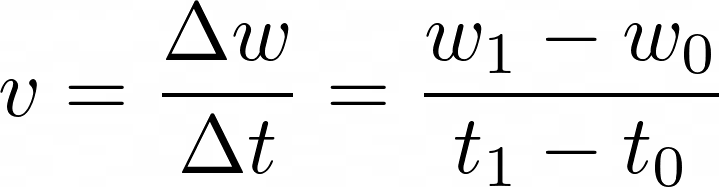

Atau

v merupakan turunan pertama baris terakhir dari fungsi dy_dx

In [ ]:
# Menampilkan nilai v dari hasil turunan data pada tanggal 09 Juli 2021
v = dy_dx[-1]
v

-5734.640400250156

**Rumus Forecasting :**


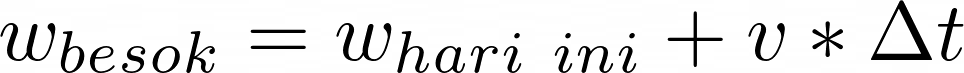

In [ ]:
# Mencari nilai forcasting menggunakan rumus
w_forecast = y.iloc[-1] + v * 1

In [ ]:
print('Berat forecasting untuk tanggal 10 Juli 2021 yaitu :', w_forecast, 'kg')

Berat forecasting untuk tanggal 10 Juli 2021 yaitu : 1066.898061288306 kg


Dari data diatas, dapat diketahui bahwa rata-rata jumlah sampah yang bisa diangkut pada tanggal 10 Juli 2021 yaitu `1066.7` kg yakni lebih kecil dari data rata-rata pada tanggal 09 Juli 2021

## **I. Jawaban Pertanyaan**

**1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?**

---
Teknik yang saya gunakan yaitu teknik `numeric`

**2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!**

---

Menurut saya, saya membutuhkan fungsi matematis untuk menghitung turunanya. Hal ini dikarenakan, dengan adanya fungsi matematis, batasan turunan dapat dilakukan dengan baik

**3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?**

---

Load weight yang saya perkirakan untuk tanggal 10 Juli 2021 yakni rata-rata 1066.7 kg

# **Poin Analisis / Kesimpulan :**

1. Diketahui bahwa berdasarkan `confidence interval` sebesar 95% pada site baru nanti akan dapat menampung rata-rata limbah sebanyak `11664-11924` kg per hari nya

2. Diketahui bahwa berdasarkan `uji hipotesis` pembuatan site baru nanti memiliki kapasitas penampungan per harinya sekitar `11398` kg

3. Diketahui bahwa pada tanggal `10 Juli 2021` rata-rata berat limbah yang dapat diangkut hanya mencapai `1066.7` kg